<a href="https://colab.research.google.com/github/jparep/pca-iris/blob/main/pca_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Principal Component Analysis (PCA) is a statistical technique used to simplify a dataset by reducing its dimensions while preserving as much variability as possible. Here’s a step-by-step process to perform PCA with an example:
Step-by-Step Process for PCA

    Standardize the Data: PCA is affected by the scale of the variables. Hence, standardizing the data is essential to give each variable equal weight.

    Covariance Matrix Computation: Calculate the covariance matrix to understand how variables in the input data relate to each other.

    Eigenvalues and Eigenvectors: Compute the eigenvalues and eigenvectors of the covariance matrix. Eigenvectors represent the directions of the new feature space, and eigenvalues represent their magnitude.

    Sort Eigenvalues and Eigenvectors: Sort the eigenvalues and their corresponding eigenvectors in descending order.

    Select Principal Components: Choose the top k eigenvectors that correspond to the k largest eigenvalues. These eigenvectors form the principal components.

    Transform the Data: Project the original data onto the new k-dimensional feature space using the selected eigenvectors.

Example: PCA on Iris Dataset

Here, we'll perform PCA on the Iris dataset, which consists of measurements of iris flowers from three different species.

Step 1: Import **Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Step 2: Compute **Covariance Matrix**

In [ ]:
# Compute covariance matrix
cov_matrix = np.cov(X_scaled, rowvar=False)

Step 3: Compute **Eigenvalues and Eigenvectors**

In [ ]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

Step 4: Sort **Eigenvalues and Eigenvectors**

In [ ]:
# Sort the eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

Step 5: Select **Principal Components**

In [ ]:
# Select the top 2 eigenvectors (for 2D projection)
n_components = 2
selected_eigenvectors = sorted_eigenvectors[:, :n_components]

Step 6: **Transform the Data**

In [ ]:
# Transform the data to the new space
X_pca = X_scaled.dot(selected_eigenvectors)

Step 7: **Visualize the Results**

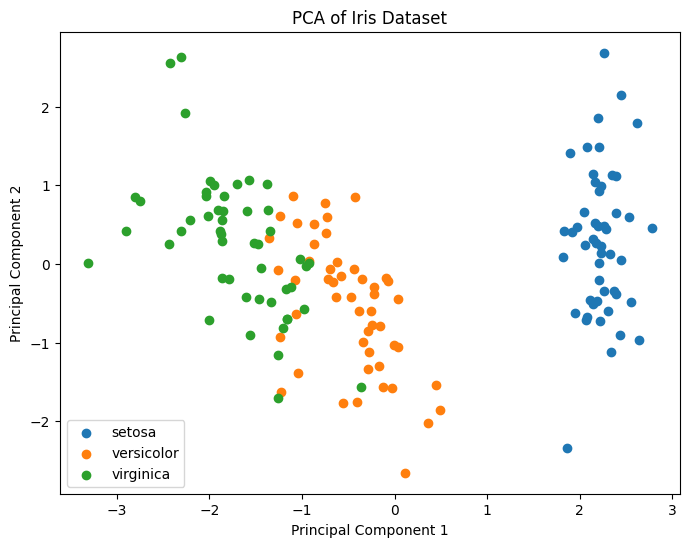

In [ ]:
# Plot the PCA result
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()